In [1]:
import numpy as np
from numpy import *
from scipy.special import erf 
%pylab inline

gIs = np.load("/home/mohamed/Data/gtrajs.npy")
eIs = np.load("/home/mohamed/Data/etrajs.npy")
print (np.shape(np.transpose(eIs)))
print (np.shape(np.load("/home/mohamed/Data/etrajs_10ns_1.npy")))
eIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/etrajs_10ns.npy"),np.load("/home/mohamed/Data/etrajs_10ns_1.npy")), axis = 1))
print (np.shape(eIs))


Populating the interactive namespace from numpy and matplotlib
(4000, 1000)
(200, 10000)
(20000, 200)


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def AWGN(steps, nbar, n_to_power):
    noise  = numpy.random.normal(size= steps)
    amp = nbar * n_to_power
    noise = np.sqrt(amp) *noise
    return noise

In [9]:
a = np.load("improved_c0.1.npy")
print np.shape(a)
np.savetxt("improved_c0.1.txt",np.reshape(a,[20000000 ]))

(2, 1000, 2, 5000)


In [12]:
a = np.load("0.1_p_with_var.npy")
print np.shape(a)
np.savetxt("0.1_p_with_var.txt",np.reshape(a,[72000000 ]))

(2, 1000, 2, 18000)


(20000, 200)
200
0.9892


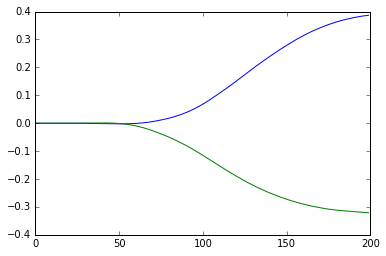

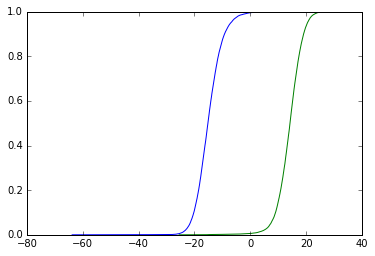

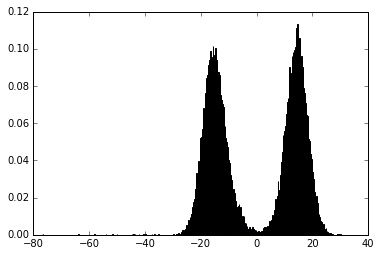

(-14.896487, 14.035353)
(4.5980196, 4.3032002)
42.2120905028
1.0


In [3]:
import matplotlib.pyplot as plt
S_g = []
S_e = []

gIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/gtrajs_10ns.npy"),np.load("/home/mohamed/Data/gtrajs_10ns_1.npy")), axis = 1))
eIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/etrajs_10ns.npy"),np.load("/home/mohamed/Data/etrajs_10ns_1.npy")), axis = 1))
print (np.shape(gIs))
g_traj = np.mean(gIs, axis =0)
e_traj = np.mean(eIs, axis = 0)
g_v = np.square(np.std(gIs, axis = 0))
e_v =  np.square(np.std(eIs, axis = 0))
diff_v =  np.abs(e_v-g_v) + np.ones_like(e_v)
diff = -(g_traj - e_traj)
plot (arange(len(g_traj)), g_traj)
plot (arange(len(g_traj)), e_traj)

ratio = 1
steps = int(ratio*len(gIs[0]))
print (steps)
n_ph = 2
for kk in range (len(gIs)):
    gIs[kk] = gIs[kk] + AWGN(len(gIs[0]), n_ph, 0.2)
    eIs[kk] = eIs[kk] + AWGN(len(gIs[0]), n_ph, 0.2)

for ii in range (len(gIs)):
    #S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]/diff_v[:steps]))
    #S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]/diff_v[:steps]))

    S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]))
    S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]))
   

    
figure()
mini = np.min(S_g + S_e)
maxi = np.max(S_g+S_e)
bins = np.linspace(1.2*mini, 1.2*maxi, 500)
h_g,g_bins = np.histogram(S_g, density = True, bins = bins)
h_e,e_bins = np.histogram(S_e,density = True, bins = bins)
X1 = np.sort(S_g)
F1 = np.array(range(len(gIs)))/float(len(gIs))
g_lines = plt.plot (X1,F1)
X2 = np.sort(S_e)
F2 = np.array(range(len(gIs)))/float(len(gIs))
e_lines = plt.plot (X2,F2)
cum_g = np.cumsum(h_g*np.diff(g_bins))
cum_e = np.cumsum(h_e*np.diff(e_bins))
X = cum_g - cum_e
print (np.max(X))

g_mean = np.mean(S_g)
e_mean = np.mean(S_e)
g_std = np.std(S_g)
e_std = np.std(S_e)
figure()
plt.hist(S_g, bins=bins,normed=1)
plt.hist(S_e, bins=bins,normed=1)
plt.show()
print (g_mean,e_mean)
print (g_std,e_std)
R = np.square(g_mean-e_mean) / (0.5*(g_std**2 + e_std**2))
print (R)
print (erf(R))

In [21]:
print (np.shape(np.load("/home/mohamed/Data/s_g.npy")))
a = np.load("/home/mohamed/Data/s_g.npy")
v = np.load("/home/mohamed/Data/v_g.npy")
print a[0:100]
print np.square(np.std(a))
print v

(1000,)
[ -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
   1.71943739e-01  -1.23228896e+00  -1.77739725e-01  -1.77739725e-01
   6.74469769e-01  -1.77739725e-01   4.65911984e-01  -2.48511776e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.15980990e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01   8.34725723e-02  -1.77739725e-01   7.22709894e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
   4.68221247e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01  -1.77739725e-01
   6.78860009e-01  -2.40542740e-01  -1.77739725e-01   7.56534636e-02
  -1.77739725e-01  -1.47596627e-01  -1.77739725e-01  -1.77739725e-01
  -1.77739725e-01  -1.7773

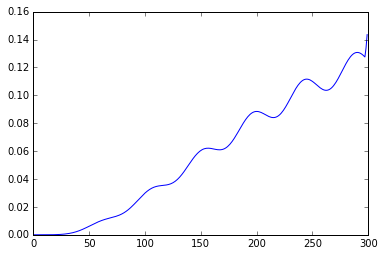

In [177]:
exp = np.load("exp_100ns_300steps_const.npy")
idx = np.random.randint(0,100000)
plot(exp[1,:,0,idx])

In [67]:
exp = np.load("/home/mohamed/Data/expects0.npy")
for ii in arange (1,120):
    t = np.load("/home/mohamed/Data/expects"+str(ii)+".npy")
    exp = np.concatenate((exp,t),axis =-1)
print (np.shape(exp))
#np.save("0.1_p_with_var",exp)

gIs=np.transpose(exp[0,:,0,:])
eIs = np.transpose(exp[1,:,0,:])

print (np.shape(gIs))


(2, 1000, 2, 1200)
(1200, 1000)


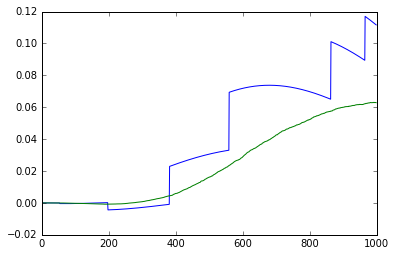

In [157]:
idx = np.random.randint(0,1200)
plot (eIs[idx])

plot (np.mean(eIs,axis=0))

(2, 1000, 2, 18000)
0.986944444444
67
-543.411805006


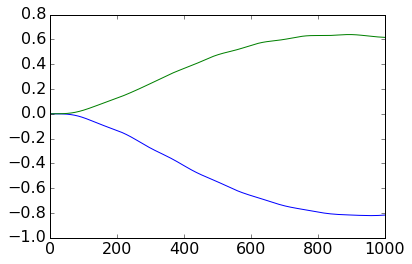

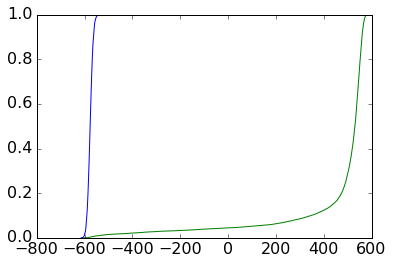

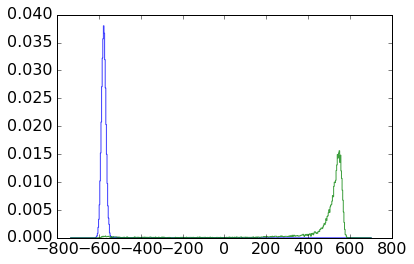

(-576.43134, 467.52795)
(11.097651, 199.0728)
27.4154681902


In [230]:
exp = np.load("exp_100ns_300steps.npy")
#exp = np.load("exp_100ns_300steps_const.npy") #0.01
exp = np.load("exp_100ns_300steps_const0.05.npy")
exp = np.load("exp_100ns_300steps_const0.1.npy")
#exp = np.load("exp_100ns_300steps_const0.2.npy")
#exp = np.load("exp_100ns_1000steps_pulse0.1.npy")
exp = np.load("0.1_p_with_var.npy")
#exp = np.load("exp_100ns_1000steps_pulse0.12.npy")
#exp = np.load("lol.npy")
#exp = np.load("improved_c0.1.npy")
print (np.shape(exp))
eIs = []
gIs = []
S_g = []
S_e = []
idx = np.random.randint(0,5000)
gIs=np.transpose(exp[0,:,0,:])
eIs = np.transpose(exp[1,:,0,:])


g_traj = np.mean(gIs, axis =0)
e_traj = np.mean(eIs, axis = 0)

#np.save("g_c",g_traj)
#np.save("e_c",e_traj)
g_v = np.square(np.std(gIs, axis = 0))
e_v =  np.square(np.std(eIs, axis = 0))
diff_v =  np.abs(e_v-g_v) + np.ones_like(e_v)
diff = -(g_traj - e_traj)
plot (arange(len(g_traj)), g_traj)
plot (arange(len(g_traj)), e_traj)

ratio = 1
steps = int(ratio*len(gIs[0]))
#print (steps)
#print (np.shape(gIs))
n_ph = 0
for kk in range (len(gIs)):
    gIs[kk,:] = gIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)
    eIs[kk,:] = eIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)

for ii in range (len(gIs)):
    #S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]/diff_v[:steps]))
    #S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]/diff_v[:steps]))

    S_g.append(np.sum(gIs[ii,:steps]*diff[:steps]))
    S_e.append(np.sum(eIs[ii,:steps]*diff[:steps]))
    
    #S_g.append(np.sum(gIs[ii,:steps]))
    #S_e.append(np.sum(eIs[ii,:steps]))
   
#print(len(S_g))
    
figure()
mini = np.min(S_g + S_e)
maxi = np.max(S_g+S_e)
bins = np.linspace(1.2*mini, 1.2*maxi, 500)
h_g,g_bins = np.histogram(S_g, density = True, bins = bins)
h_e,e_bins = np.histogram(S_e,density = True, bins = bins)
X1 = np.sort(S_g)
F1 = np.array(range(len(gIs)))/float(len(gIs))
g_lines = plt.plot (X1,F1)
X2 = np.sort(S_e)
F2 = np.array(range(len(gIs)))/float(len(gIs))
e_lines = plt.plot (X2,F2)
cum_g = np.cumsum(h_g*np.diff(g_bins))
cum_e = np.cumsum(h_e*np.diff(e_bins))
X = cum_g - cum_e
#print (X)
print (np.max(X))
print (np.argmax(X))
print (g_bins[np.argmax(X)])

g_mean = np.mean(S_g)
e_mean = np.mean(S_e)
g_std = np.std(S_g)
e_std = np.std(S_e)
figure()
plt.hist(S_g, bins=bins,normed=1,facecolor='green', alpha=0.75, histtype = 'step')
plt.hist(S_e, bins=bins,normed=1,facecolor='r', alpha=0.75, histtype = 'step')

#np.save("Sg_p",S_g)
#np.save("Se_p",S_e)

plt.show()
print (g_mean,e_mean)
print (g_std,e_std)
R = np.square(g_mean-e_mean) / ((g_std**2 + e_std**2))
print (R)
#print (erf(R))


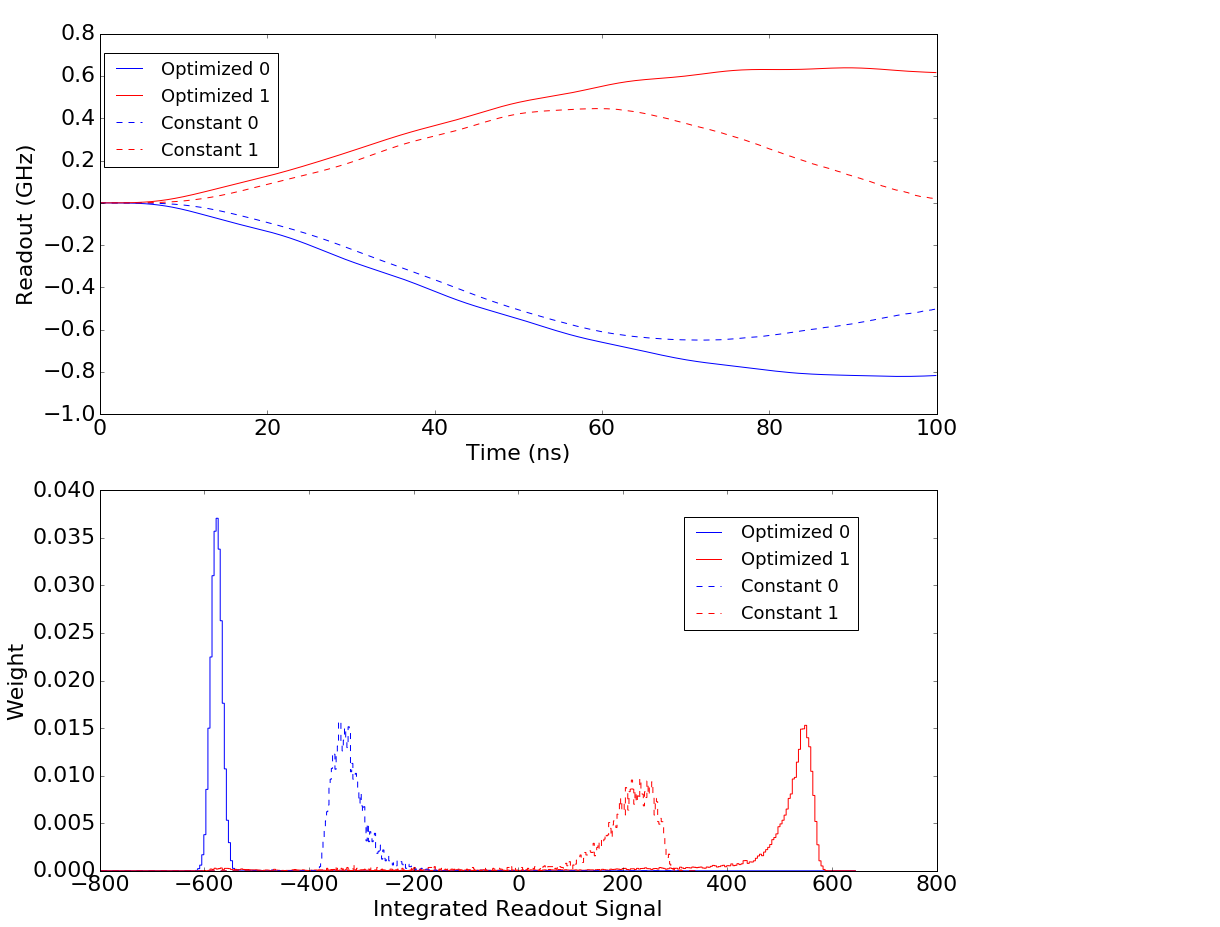

In [285]:
#(-389.7464, 224.3273)
#(49.372379, 132.69862)

#(-576.42548, 467.49768)
#(18.342115, 199.59175)
matplotlib.rcParams.update({'font.size': 22})


g_p = np.load("g_p.npy")
g_c = np.load("g_c.npy")
e_p = np.load("e_p.npy")
e_c = np.load("e_c.npy")

fig = plt.figure(figsize=(30,15)) 
gs = matplotlib.gridspec.GridSpec(2,1, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])

ax0.plot(0.1*np.arange(0,1000),g_p,'b',label="Optimized 0")
ax0.plot(0.1*np.arange(0,1000),e_p,'r',label="Optimized 1")
ax0.plot(0.1*np.arange(0,1000),g_c,'--b',label ="Constant 0")
ax0.plot(0.1*np.arange(0,1000),e_c,'--r',label ="Constant 1")
ax0.set_xlabel("Time (ns)")
ax0.set_ylabel("Readout (GHz)")
#ax0.legend(loc ="upper left")

S_g_p = np.load("Sg_p.npy")
S_g_c = np.load("Sg_c.npy")
S_e_p = np.load("Se_p.npy")
S_e_c = np.load("Se_c.npy")

mini_p = np.min(S_g_p + S_e_p)
maxi_p = np.max(S_e_p)


bins_p = np.linspace(1.1*mini_p, 1.1*maxi_p, 500)

mini_c = np.min(S_g_c + S_e_c)
maxi_c = np.max(S_e_c)
bins_c = np.linspace(1.1*mini_c, 1.1*maxi_c, 500)

ax1 = plt.subplot(gs[1])
ax1.hist(S_g_p, bins=bins_p,normed=1,color='b', alpha=1, histtype = 'step',label="Optimized 0")
ax1.hist(S_e_p, bins=bins_p,normed=1,color='r', alpha=1, histtype = 'step',label="Optimized 1")

ax1.hist(S_g_c, bins=bins_c,normed=1,color='b',  histtype = 'step',linestyle=('dashed'),label ="Constant 0")
ax1.hist(S_e_c, bins=bins_c,normed=1,color='r', histtype = 'step',linestyle=('dashed'),label ="Constant 1")

ax1.set_xlim(xmin=-800,xmax =800)
ax1.set_xlabel("Integrated Readout Signal")
ax1.set_ylabel("Weight")
#ax1.legend()
handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.56,0.32),prop={'size': 18})
fig.legend(handles, labels, loc=(0.085,0.82),prop={'size': 18})

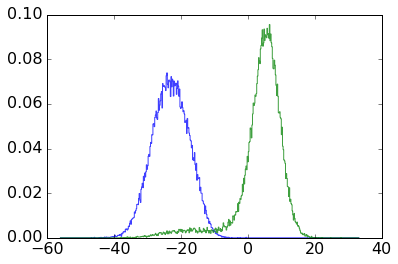

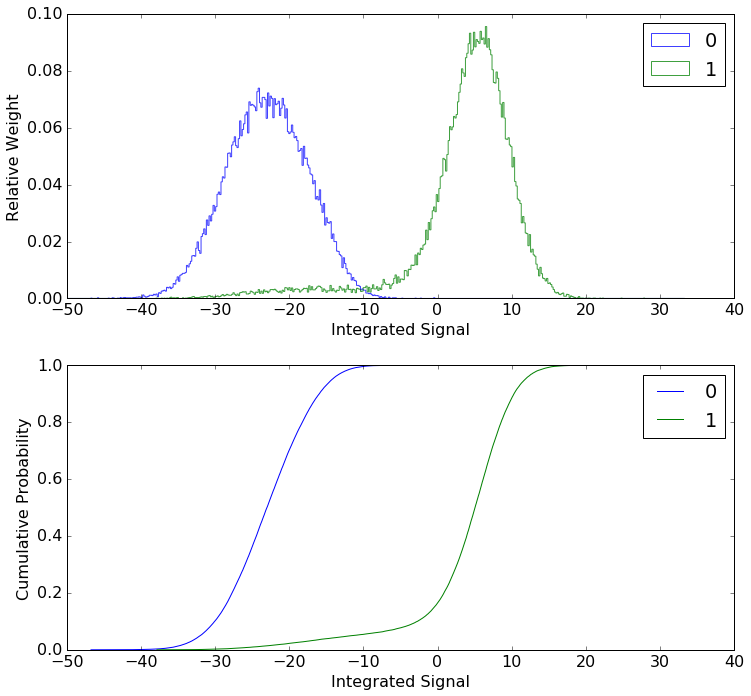

In [55]:
matplotlib.rcParams.update({'font.size': 16})

figure()
plt.hist(S_g, bins=bins,normed=1,facecolor='green', alpha=0.75, histtype = 'step')
plt.hist(S_e, bins=bins,normed=1,facecolor='r', alpha=0.75, histtype = 'step')
plt.show()

fig = plt.figure(figsize=(20, 10)) 
gs = matplotlib.gridspec.GridSpec(2,1, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
ax0.hist(S_g, bins=bins,normed=1,facecolor='green', alpha=0.75, histtype = 'step', label ="0")
ax0.hist(S_e, bins=bins,normed=1,facecolor='green', alpha=0.75, histtype = 'step', label ="1")

ax0.set_xlabel("Integrated Signal")
ax0.set_ylabel("Relative Weight")
ax0.legend()
ax0.set_xlim([-50,40])
ax1 = plt.subplot(gs[1])
ax1.plot (X1,F1,label="0")
ax1.plot (X2,F2,label="1")
ax1.set_xlabel("Integrated Signal")
ax1.set_ylabel("Cumulative Probability")
ax1.legend()
ax1.set_xlim([-50,40])

#ax1.set_ylim([0,1.1])
plt.tight_layout()
plt.show()

In [365]:
exp = np.load("exp_100ns_300steps.npy")
#exp = np.load("exp_100ns_300steps_const.npy") #0.01
#exp = np.load("exp_100ns_300steps_const0.05.npy")
exp = np.load("exp_100ns_300steps_const0.1.npy")
exp = np.load("exp_100ns_300steps_const0.2.npy")
#exp = np.load("exp_100ns_1000steps_pulse0.1.npy")
#exp = np.load("exp_100ns_1000steps_pulse0.12.npy")
#exp = np.load("lol.npy")
exp = np.load("0.1_p_with_var.npy")


#print (np.shape(exp))
eIs = []
gIs = []
S_g = []
S_e = []
idx = np.random.randint(0,5000)
gIs=np.transpose(exp[0,:,0,:])
eIs = np.transpose(exp[1,:,0,:])
time = 100

g_traj = np.mean(gIs, axis =0)
e_traj = np.mean(eIs, axis = 0)
g_v = np.square(np.std(gIs, axis = 0))
e_v =  np.square(np.std(eIs, axis = 0))
diff_v =  np.abs(e_v-g_v) + np.ones_like(e_v)
diff = -(g_traj - e_traj)
#plot (arange(len(g_traj)), g_traj)
#plot (arange(len(g_traj)), e_traj)


n_ph = 20
f = []

    
for kk in range (len(gIs)):
    gIs[kk,:] = gIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)
    eIs[kk,:] = eIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)
#ratios = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ratios = np.linspace(0.01,1,100)
curr = []
for ratio in ratios:
    steps = int(ratio*len(gIs[0]))
    #print (steps)
    #print (np.shape(gIs))
    S_g = []
    S_e = []

    for ii in range (len(gIs)):
        #S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]/diff_v[:steps]))
        #S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]/diff_v[:steps]))

        S_g.append(np.sum(gIs[ii,:steps]*diff[:steps]))
        S_e.append(np.sum(eIs[ii,:steps]*diff[:steps]))

    #print(len(S_g))

    mini = np.min(S_g + S_e)
    maxi = np.max(S_g+S_e)
    bins = np.linspace(1.2*mini, 1.2*maxi, 500)
    h_g,g_bins = np.histogram(S_g, density = True, bins = bins)
    h_e,e_bins = np.histogram(S_e,density = True, bins = bins)
    X1 = np.sort(S_g)
    F1 = np.array(range(len(gIs)))/float(len(gIs))
    X2 = np.sort(S_e)
    F2 = np.array(range(len(gIs)))/float(len(gIs))

    cum_g = np.cumsum(h_g*np.diff(g_bins))
    cum_e = np.cumsum(h_e*np.diff(e_bins))
    X = cum_g - cum_e
    #print (X)
    curr.append(np.max(X))
    #print (np.max(X))
    #print (int(ratio*time),np.max(X))
print (np.max(curr))



0.976055555556


[0.0071666666666666545, 0.011833333333333196, 0.012722222222222301, 0.015222222222222248, 0.011444444444444424, 0.00938888888888878, 0.015277777777777835, 0.017277777777777892, 0.034388888888888747, 0.046166666666666911, 0.061499999999999999, 0.086388888888888737, 0.11594444444444424, 0.13927777777777767, 0.16300000000000003, 0.19088888888888933, 0.22205555555555573, 0.25777777777777805, 0.29366666666666674, 0.32966666666666677, 0.36644444444444463, 0.40733333333333344, 0.44350000000000034, 0.48255555555555552, 0.52500000000000013, 0.56466666666666687, 0.60116666666666629, 0.63866666666666605, 0.66883333333333295, 0.70583333333333353, 0.74066666666666625, 0.77377777777777768, 0.80161111111111083, 0.82750000000000012, 0.8506111111111111, 0.87155555555555597, 0.89077777777777778, 0.9048333333333336, 0.91938888888888914, 0.93072222222222223, 0.9420555555555562, 0.94788888888888878, 0.95438888888888862, 0.95922222222222209, 0.96372222222222148, 0.96622222222222243, 0.96816666666666684, 0.9

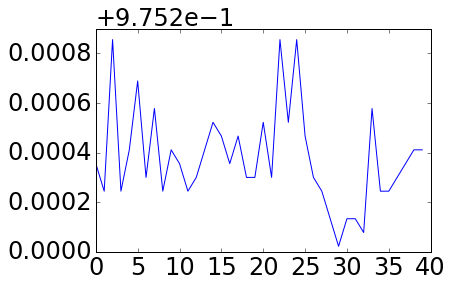

In [366]:
cr = list(curr)
cr[np.argmax(curr)] =0
print curr,100*ratios[np.argmax(curr)],np.argmax(curr),np.argmax(cr)
#8,36,60,63,66,66,66,68,68,69,71,
#20:89-84, 30:82
plot(curr[60:100])

In [7]:
def get_f(n_ph,exp):

    #print (np.shape(exp))
    eIs = []
    gIs = []
    S_g = []
    S_e = []
    idx = np.random.randint(0,5000)
    gIs=np.transpose(exp[0,:,0,:])
    eIs = np.transpose(exp[1,:,0,:])
    time = 100

    g_traj = np.mean(gIs, axis =0)
    e_traj = np.mean(eIs, axis = 0)
    g_v = np.square(np.std(gIs, axis = 0))
    e_v =  np.square(np.std(eIs, axis = 0))
    diff_v =  np.abs(e_v-g_v) + np.ones_like(e_v)
    diff = -(g_traj - e_traj)
    #plot (arange(len(g_traj)), g_traj)
    #plot (arange(len(g_traj)), e_traj)


   
    curr = []


    for kk in range (len(gIs)):
        gIs[kk,:] = gIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)
        eIs[kk,:] = eIs[kk,:] + AWGN(len(gIs[0]), n_ph, 0.2)
    #ratios = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    ratios = np.linspace(0.01,1,100)
    for ratio in ratios:
        steps = int(ratio*len(gIs[0]))
        #print (steps)
        #print (np.shape(gIs))
        S_g = []
        S_e = []

        for ii in range (len(gIs)):
            #S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]/diff_v[:steps]))
            #S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]/diff_v[:steps]))

            S_g.append(np.sum(gIs[ii,:steps]*diff[:steps]))
            S_e.append(np.sum(eIs[ii,:steps]*diff[:steps]))

        #print(len(S_g))

        mini = np.min(S_g + S_e)
        maxi = np.max(S_g+S_e)
        bins = np.linspace(1.2*mini, 1.2*maxi, 500)
        h_g,g_bins = np.histogram(S_g, density = True, bins = bins)
        h_e,e_bins = np.histogram(S_e,density = True, bins = bins)
        X1 = np.sort(S_g)
        F1 = np.array(range(len(gIs)))/float(len(gIs))
        X2 = np.sort(S_e)
        F2 = np.array(range(len(gIs)))/float(len(gIs))

        cum_g = np.cumsum(h_g*np.diff(g_bins))
        cum_e = np.cumsum(h_e*np.diff(e_bins))
        X = cum_g - cum_e
        #print (X)
        curr.append(np.max(X))
        #print (np.max(X))
        #print (int(ratio*time),np.max(X))
    return np.max(curr),np.argmax(curr)/float(len(curr))



0.976


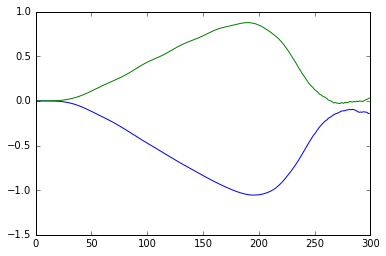

In [86]:
expo = np.load("exp_100ns_300steps_const0.2.npy")
print (get_f(22,expo,1))

#for n in range (41):
    #print n, get_f(n,expo)

In [104]:
expo = np.load("exp_100ns_300steps_const0.2.npy")
#print (get_f(22,expo,1))
f_c2 = []
r_c2 = []
for n in range(41):
    cur = []
    
    expo = np.load("exp_100ns_300steps_const0.2.npy")
    f,r = get_f(n,expo)
    f_c2.append(f)
    r_c2.append(r)
    print n,f,r

0 1.0 0.01
1 0.991 0.39
2 0.991 0.51
3 0.988 0.44
4 0.986 0.56
5 0.986 0.67
6 0.987 0.57
7 0.984 0.66
8 0.986 0.79
9 0.984 0.69
10 0.982 0.49
11 0.983 0.55
12 0.985 0.69
13 0.98 0.54
14 0.985 0.63
15 0.985 0.76
16 0.983 0.86
17 0.981 0.8
18 0.978 0.68
19 0.979 0.72
20 0.977 0.76
21 0.979 0.61
22 0.98 0.69
23 0.983 0.67
24 0.977 0.71
25 0.975 0.65
26 0.979 0.67
27 0.977 0.75
28 0.979 0.68
29 0.979 0.86
30 0.975 0.73
31 0.979 0.67
32 0.976 0.67
33 0.973 0.75
34 0.972 0.72
35 0.974 0.76
36 0.977 0.73
37 0.975 0.78
38 0.974 0.74
39 0.972 0.77
40 0.971 0.74


In [105]:
expo = np.load("lol.npy")
#print (get_f(22,expo,1))
f_p2 = []
r_p2 = []
for n in range(41):
    cur = []
    
    expo = np.load("lol.npy")

    f,r = get_f(n,expo)
    f_p2.append(f)
    r_p2.append(r)
    print n,f,r

0 1.0 0.0
1 0.991 0.26
2 0.992 0.38
3 0.989 0.57
4 0.988 0.34
5 0.987 0.7
6 0.988 0.56
7 0.986 0.3
8 0.987 0.32
9 0.986 0.31
10 0.986 0.45
11 0.986 0.46
12 0.985 0.34
13 0.986 0.46
14 0.985 0.38
15 0.985 0.39
16 0.985 0.86
17 0.983 0.35
18 0.985 0.4
19 0.984 0.4
20 0.984 0.47
21 0.983 0.74
22 0.986 0.61
23 0.983 0.41
24 0.983 0.4
25 0.985 0.5
26 0.985 0.59
27 0.984 0.51
28 0.982 0.46
29 0.983 0.79
30 0.985 0.9
31 0.982 0.65
32 0.983 0.69
33 0.981 0.51
34 0.983 0.71
35 0.98 0.89
36 0.983 0.85
37 0.985 0.48
38 0.982 0.57
39 0.982 0.63
40 0.979 0.56


In [4]:
expo = np.load("exp_100ns_1000steps_pulse0.1.npy")
expo = np.load("0.1_p_with_var.npy")
#print (get_f(22,expo,1))
f_p1 = []
r_p1 = []
for n in range(41):
    cur = []
    
    expo = np.load("0.1_p_with_var.npy")


    f1,r1 = get_f(n,expo)
    expo = np.load("0.1_p_with_var.npy")


    f2,r2 = get_f(n,expo)
    expo = np.load("0.1_p_with_var.npy")


    f3,r3 = get_f(n,expo)
    f = np.mean([f1,f2,f3])
    r = np.mean([r1,r2,r3])
    f_p1.append(f)
    r_p1.append(r)
    print n,f,r

np.save("pulse_f",f_p1)
np.save("pulse_t",r_p1)

0 0.999722222222 0.07
1 0.988759259259 0.396666666667
2 0.986296296296 0.503333333333
3 0.984740740741 0.723333333333
4 0.984185185185 0.476666666667
5 0.983444444444 0.563333333333
6 0.982759259259 0.58
7 0.981907407407 0.666666666667
8 0.982037037037 0.56
9 0.98112962963 0.74
10 0.980814814815 0.706666666667
11 0.980166666667 0.65
12 0.980037037037 0.69
13 0.979314814815 0.686666666667
14 0.979240740741 0.67
15 0.978537037037 0.653333333333
16 0.978648148148 0.636666666667
17 0.978185185185 0.73
18 0.977648148148 0.693333333333
19 0.977277777778 0.773333333333
20 0.976962962963 0.876666666667
21 0.976425925926 0.853333333333
22 0.975944444444 0.743333333333
23 0.975722222222 0.776666666667
24 0.975796296296 0.813333333333
25 0.975666666667 0.84
26 0.975425925926 0.816666666667
27 0.97462962963 0.736666666667
28 0.974777777778 0.736666666667
29 0.974740740741 0.886666666667
30 0.974296296296 0.79
31 0.974166666667 0.866666666667
32 0.973592592593 0.783333333333
33 0.973611111111 0.86


In [14]:
expo = np.load("exp_100ns_1000steps_pulse0.1.npy")
#print (get_f(22,expo,1))
f_p1_2 = []
r_p1_2 = []
for n in range(41):
    cur = []
    
    expo = np.load("exp_100ns_1000steps_pulse0.1.npy")


    f1,r1 = get_f(n,expo)
    expo = np.load("exp_100ns_1000steps_pulse0.1.npy")


    f2,r2 = get_f(n,expo)
    expo = np.load("exp_100ns_1000steps_pulse0.1.npy")


    f3,r3 = get_f(n,expo)
    f = np.mean([f1,f2,f3])
    r = np.mean([r1,r2,r3])
    f_p1_2.append(f)
    r_p1_2.append(r)
    print n,f,r

np.save("pulse_f_2",f_p1_2)
np.save("pulse_t_2",r_p1_2)

0 0.999466666667 0.09
1 0.987533333333 0.37
2 0.985311111111 0.433333333333
3 0.983488888889 0.41
4 0.982311111111 0.49
5 0.981844444444 0.49
6 0.980777777778 0.526666666667
7 0.980511111111 0.54
8 0.9798 0.57
9 0.979222222222 0.543333333333
10 0.978466666667 0.566666666667
11 0.978511111111 0.56
12 0.977511111111 0.6
13 0.976955555556 0.606666666667
14 0.976022222222 0.59
15 0.976044444444 0.6
16 0.975822222222 0.643333333333
17 0.974933333333 0.656666666667
18 0.974577777778 0.666666666667
19 0.9744 0.646666666667
20 0.973555555556 0.686666666667
21 0.973311111111 0.696666666667
22 0.972866666667 0.7
23 0.972555555556 0.726666666667
24 0.972044444444 0.696666666667
25 0.971844444444 0.713333333333
26 0.971244444444 0.673333333333
27 0.971311111111 0.7
28 0.9706 0.72
29 0.970711111111 0.746666666667
30 0.969622222222 0.746666666667
31 0.969577777778 0.72
32 0.969377777778 0.693333333333
33 0.969444444444 0.736666666667
34 0.968888888889 0.793333333333
35 0.967577777778 0.76
36 0.9678 

In [7]:
expo = np.load("exp_100ns_300steps_const0.1.npy")#print (get_f(22,expo,1))
f_c1 = []
r_c1 = []
for n in range(41):
    cur = []
    
    expo = np.load("exp_100ns_300steps_const0.1.npy")
    f1,r1 = get_f(n,expo)
    expo = np.load("exp_100ns_300steps_const0.1.npy")

    f2,r2 = get_f(n,expo)
    expo = np.load("exp_100ns_300steps_const0.1.npy")

    f3,r3 = get_f(n,expo)
    f = np.mean([f1,f2,f3])
    r = np.mean([r1,r2,r3])

    f_c1.append(f)
    r_c1.append(r)
    print n,f,r

np.save("const_f",f_c1)
np.save("const_t",r_c1)

0 0.9999 0.0
1 0.981166666667 0.72
2 0.978466666667 0.843333333333
3 0.976333333333 0.86
4 0.974066666667 0.853333333333
5 0.972833333333 0.913333333333
6 0.970933333333 0.833333333333
7 0.9692 0.906666666667
8 0.968933333333 0.956666666667
9 0.967633333333 0.903333333333
10 0.966733333333 0.926666666667
11 0.965766666667 0.913333333333
12 0.9656 0.966666666667
13 0.964266666667 0.956666666667
14 0.962833333333 0.936666666667
15 0.962166666667 0.953333333333
16 0.961966666667 0.97
17 0.9616 0.96
18 0.960666666667 0.936666666667
19 0.959566666667 0.963333333333
20 0.958966666667 0.93
21 0.958 0.963333333333
22 0.957566666667 0.953333333333
23 0.957 0.98
24 0.956666666667 0.986666666667
25 0.9561 0.966666666667
26 0.955366666667 0.973333333333
27 0.9549 0.956666666667
28 0.9551 0.966666666667
29 0.954033333333 0.973333333333
30 0.954433333333 0.976666666667
31 0.952466666667 0.99
32 0.9523 0.976666666667
33 0.9525 0.966666666667
34 0.952133333333 0.97
35 0.950566666667 0.95
36 0.9499 0.9

In [8]:
expo = np.load("improved_c0.1.npy")#print (get_f(22,expo,1))
f_c1_2 = []
r_c1_2 = []
for n in range(41):
    cur = []
    cur_f = []
    for ii in range(30):
        expo = np.load("improved_c0.1.npy")
        f1,r1 = get_f(n,expo)
        cur.append(r1)
        cur_f.append(f1)
    
    f = np.mean(cur_f)
    r = np.mean(cur)

    f_c1_2.append(f)
    r_c1_2.append(r)
    print n,f,r

np.save("const_f_2",f_c1_2)
np.save("const_t_2",r_c1_2)

0 1.0 0.0
1 0.983166666667 0.501666666667
2 0.980933333333 0.563666666667
3 0.979333333333 0.578333333333
4 0.977913333333 0.598
5 0.977013333333 0.647666666667
6 0.97624 0.651333333333
7 0.975393333333 0.688666666667
8 0.974566666667 0.701333333333
9 0.974 0.694
10 0.97314 0.707666666667
11 0.972606666667 0.722
12 0.97182 0.736666666667
13 0.97138 0.745666666667
14 0.970886666667 0.725
15 0.970506666667 0.736666666667
16 0.969593333333 0.740333333333
17 0.96916 0.745333333333
18 0.968613333333 0.744666666667
19 0.967573333333 0.748333333333
20 0.96752 0.752666666667
21 0.966693333333 0.737666666667
22 0.966353333333 0.764
23 0.966033333333 0.755666666667
24 0.965266666667 0.769333333333
25 0.96496 0.774333333333
26 0.96482 0.764333333333
27 0.964293333333 0.768333333333
28 0.964133333333 0.776666666667
29 0.963546666667 0.777
30 0.963173333333 0.760666666667
31 0.962946666667 0.777
32 0.96268 0.774
33 0.962086666667 0.788
34 0.96196 0.793666666667
35 0.9613 0.791666666667
36 0.9611733

In [ ]:
expo = np.load("improved_c0.1.npy")#print (get_f(22,expo,1))
f_c1_2 = []
r_c1_2 = []
for n in range(41):
    cur = []
    cur_f = []
    for ii in range(30):
        expo = np.load("improved_c0.1.npy")
        f1,r1 = get_f(n,expo)
        cur.append(r1)
        cur_f.append(f1)
    
    f = np.mean(cur_f)
    r = np.mean(cur)

    f_c1_2.append(f)
    r_c1_2.append(r)
    print n,f,r

np.save("const_f_2",f_c1_2)
np.save("const_t_2",r_c1_2)

In [ ]:
expo = np.load("0.1_p_with_var.npy")

f_p1 = []
r_p1 = []
for n in range(41):
    cur = []
    cur_f = []
    for ii in range(30):
        expo = np.load("0.1_p_with_var.npy")
        f1,r1 = get_f(n,expo)
        cur.append(r1)
        cur_f.append(f1)
    
    f = np.mean(cur_f)
    r = np.mean(cur)

    f_p1.append(f)
    r_p1.append(r)
    print n,f,r

np.save("pulse_f",f_p1)
np.save("pulse_t",r_p1)

0.972177777778 0.96014
0.976919444444 0.96751


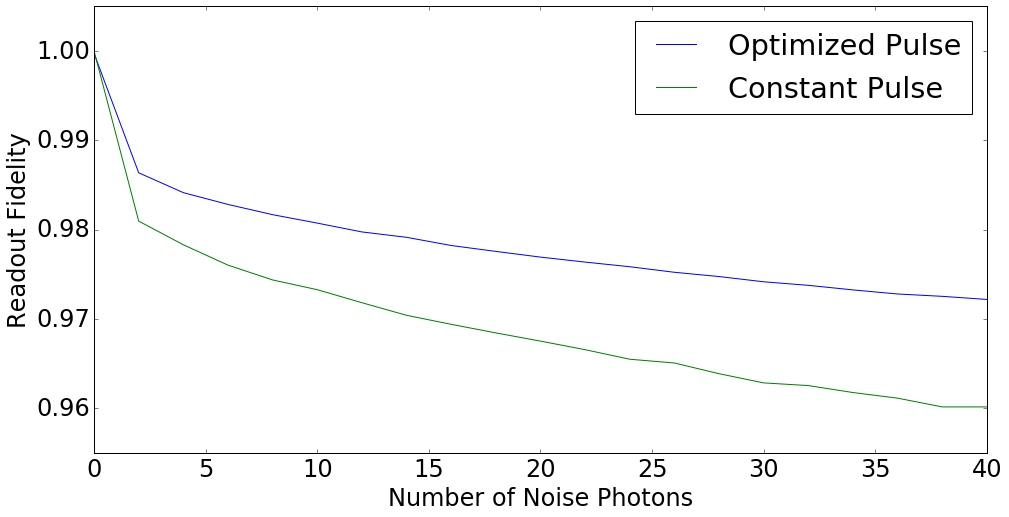

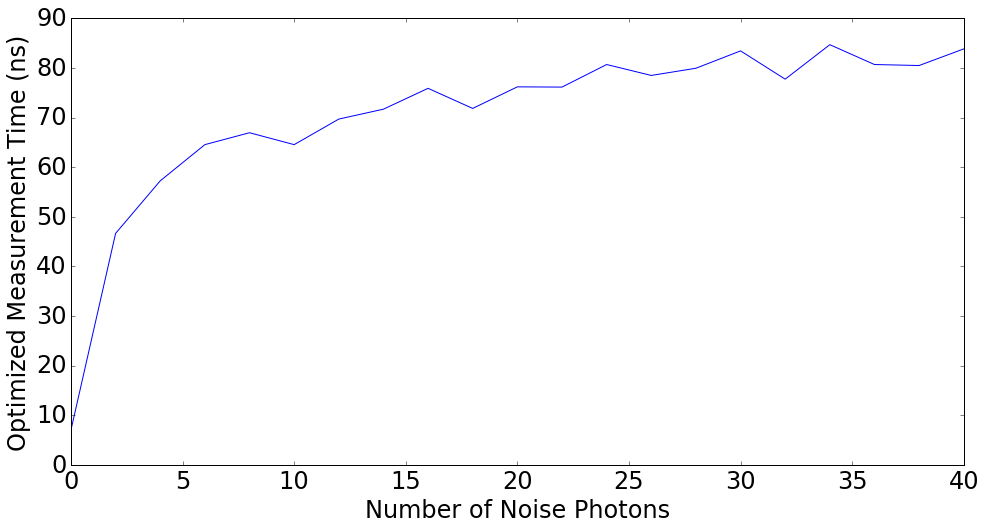

In [11]:
#plot(f_c1)
#matplotlib.rcParams.update({'font.size': 24})

f_p1 = np.load("pulse_f.npy")
#f_p1_2 =  np.load("pulse_f_2.npy")
f_c1_2 = np.load("const_f_2.npy")

fig = plt.figure(figsize=(16,8)) 
plot(2*np.arange(0,21),f_p1,label ="Optimized Pulse")
plot (2*np.arange(0,21), f_c1_2,label= "Constant Pulse")
plt.legend()
plt.xlabel("Number of Noise Photons")
plt.ylabel("Readout Fidelity")
plt.ylim(ymin =0.955)
#plot(f_p1_2)
#r_p1_2 =  np.load("pulse_t_2.npy")
r_c1_2 = np.load("const_t_2.npy")
r_p1 =  np.load("pulse_t.npy")

fig = plt.figure(figsize=(16,8)) 
#plot([100*r for r in r_c1])
plot(2*np.arange(0,21),[100*r for r in r_p1])
#plot(2*np.arange(0,21),[100*r for r in r_c1_2])
#plot([100*r for r in r_p1_2])
plt.xlabel("Number of Noise Photons")
plt.ylabel("Optimized Measurement Time (ns)")
#figure()
#plot(f_c2)
#plot(f_p2)
#print f_p1[40],f_c1_2[40]
print f_p1[20],f_c1_2[20]
print f_p1[10],f_c1_2[10]

In [12]:
a = np.load("improved_c0.1.npy")
print np.shape(a)

b =  np.load("exp_100ns_300steps_const0.1.npy")
print np.shape(b)

(2, 1000, 2, 5000)
(2, 300, 2, 10000)


0.98855


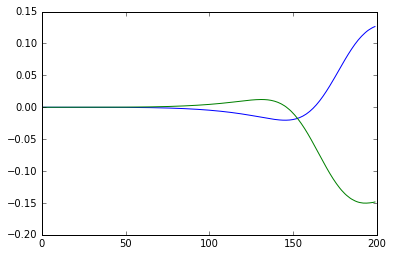

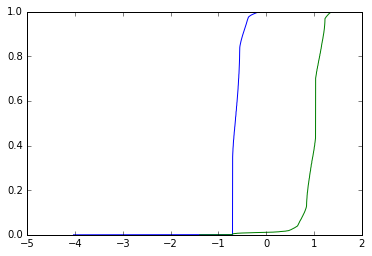

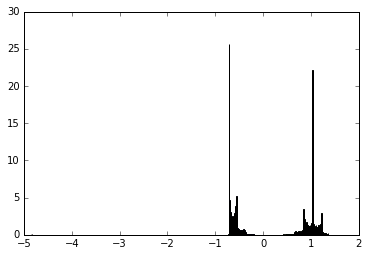

(-0.61995095, 0.97939944)
(0.10860667, 0.23005119)


In [4]:
import matplotlib.pyplot as plt
S_g = []
S_e = []

gIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/gtrajs_10ns_noop_0.npy"),np.load("/home/mohamed/Data/gtrajs_10ns_noop_1.npy")), axis = 1))
eIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/etrajs_10ns_noop_0.npy"),np.load("/home/mohamed/Data/etrajs_10ns_noop_1.npy")), axis = 1))
g_traj = np.mean(gIs, axis =0)
e_traj = np.mean(eIs, axis = 0)
diff = -(g_traj - e_traj)
plot (arange(len(g_traj)), g_traj)
plot (arange(len(g_traj)), e_traj)

ratio = 1
steps = int(ratio*len(gIs[0]))
#print (steps)

for kk in range (len(gIs)):
    gIs[kk] = gIs[kk] + AWGN(len(gIs[0]), 0, 0.2)
    eIs[kk] = eIs[kk] + AWGN(len(gIs[0]), 0, 0.2)

for ii in range (len(gIs)):
    S_g.append(np.sum(gIs[ii][:steps]*diff[:steps]))
    S_e.append(np.sum(eIs[ii][:steps]*diff[:steps]))

    
figure()
mini = np.min(S_g + S_e)
maxi = np.max(S_g+S_e)
bins = np.linspace(1.2*mini, 1.2*maxi, 500)
h_g,g_bins = np.histogram(S_g, density = True, bins = bins)
h_e,e_bins = np.histogram(S_e,density = True, bins = bins)
X1 = np.sort(S_g)
F1 = np.array(range(len(gIs)))/float(len(gIs))
g_lines = plt.plot (X1,F1)
X2 = np.sort(S_e)
F2 = np.array(range(len(gIs)))/float(len(gIs))
e_lines = plt.plot (X2,F2)
cum_g = np.cumsum(h_g*np.diff(g_bins))
cum_e = np.cumsum(h_e*np.diff(e_bins))
X = cum_g - cum_e
print (np.max(X))

g_mean = np.mean(S_g)
e_mean = np.mean(S_e)
g_std = np.std(S_g)
e_std = np.std(S_e)
figure()
plt.hist(S_g, bins=bins,normed=1)
plt.hist(S_e, bins=bins,normed=1)
plt.show()
print (g_mean,e_mean)
print (g_std,e_std)

In [39]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf

gIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/gtrajs_10ns_noop_0.npy"),np.load("/home/mohamed/Data/gtrajs_10ns_noop_1.npy")), axis = 1))
eIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/etrajs_10ns_noop_0.npy"),np.load("/home/mohamed/Data/etrajs_10ns_noop_1.npy")), axis = 1))

gIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/gtrajs_10ns.npy"),np.load("/home/mohamed/Data/gtrajs_10ns_1.npy")), axis = 1))
eIs = np.transpose(np.concatenate((np.load("/home/mohamed/Data/etrajs_10ns.npy"),np.load("/home/mohamed/Data/etrajs_10ns_1.npy")), axis = 1))


num_traj = len(gIs)
steps = len(gIs[0])
for kk in range (num_traj):
    gIs[kk] = gIs[kk] + AWGN(steps, 10, 0.2)
    eIs[kk] = eIs[kk] + AWGN(steps, 10, 0.2)

num_train = int(3*num_traj/4)
g_train = gIs[0:num_train ]
e_train = eIs[0:num_train ]
g_test = gIs[num_train :]
e_test = eIs[num_train:]

g_labels = []
e_labels = []
for ii in range (num_traj):
    
    g_labels.append([1,0])
    e_labels.append([0,1])

g_train_labels = g_labels[0:num_train ]
e_train_labels = e_labels[0:num_train ]
g_test_labels = g_labels[num_train: ]
e_test_labels = e_labels[num_train: ]
all_train = np.concatenate((g_train,e_train))
all_train_labels = np.concatenate((g_train_labels,e_train_labels))
all_test = np.concatenate((g_test,e_test))
all_test_labels = np.concatenate((g_test_labels,e_test_labels))

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

all_train, all_train_labels = unison_shuffled_copies(all_train, all_train_labels)
all_test, all_test_labels = unison_shuffled_copies(all_test, all_test_labels)

#ratios = np.linspace(0.1,1,100)
ratios = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
acs = []
steps_0 = steps
all_train_0 = all_train
all_test_0 = all_test
for r in ratios:
    ratio = r
    steps = int(ratio*steps_0)
    all_train = all_train_0[:,0:steps]

    all_test = all_test_0[:,0:steps]


    rate = 0.5
    x = tf.placeholder(tf.float32, [None, steps])
    W = tf.Variable(tf.zeros([steps, 2]))
    b = tf.Variable(tf.zeros([2]))
    m = tf.Variable(tf.zeros([steps,2]))
    y = tf.matmul(tf.square(x),m) + tf.matmul(x, W) + b
    y =  tf.matmul(x, W) + b
    y_ = tf.placeholder(tf.float32, [None, 2])
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(rate).minimize(cross_entropy)
    sess = tf.InteractiveSession(config = tf.ConfigProto(device_count = {'GPU': 0}))
    tf.global_variables_initializer().run()

    sess.run(train_step, feed_dict={x: all_train, y_: all_train_labels})
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    ac, res, inpu  = (sess.run([accuracy,y,y_], feed_dict={x: all_test,
                                      y_: all_test_labels}))
    acs.append(2*ac -1)
    print (2*ac-1)
    
    
    
#plot(200*ratios,acs)
#ylabel("Accuracy")
#xlabel("Final Time (ns)")
'''
print (ac)
counter = 0
errors = []
for index in range (len(res)):
    if inpu[index][0] == 0:
        if res[index] [0] < 0 and  res[index] [1] > 0:
            counter = counter +1
        else:
            errors.append(index)
    else:
        if res[index] [0] > 0 and  res[index] [1] < 0:
            counter = counter +1
        else:
            errors.append(index)
print (counter/len(res))
print (errors)
plot (arange(steps), all_test[errors[0]])
'''
#ylabel(str(np.argmax(all_test_labels[errors[0]])))

0.91740000248
0.850399971008
0.734599947929
0.568400025368
0.340199947357
0.15499997139
0.0368000268936
0.00559997558594
-0.000599980354309
-0.00480002164841


'\nprint (ac)\ncounter = 0\nerrors = []\nfor index in range (len(res)):\n    if inpu[index][0] == 0:\n        if res[index] [0] < 0 and  res[index] [1] > 0:\n            counter = counter +1\n        else:\n            errors.append(index)\n    else:\n        if res[index] [0] > 0 and  res[index] [1] < 0:\n            counter = counter +1\n        else:\n            errors.append(index)\nprint (counter/len(res))\nprint (errors)\nplot (arange(steps), all_test[errors[0]])\n'

In [43]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf

gIs = np.transpose(np.load("/home/mohamed/Data/gtrajs.npy"))
eIs = np.transpose(np.load("/home/mohamed/Data/etrajs.npy"))

num_traj = len(gIs)
steps = len(gIs[0])
print (steps)
for kk in range (num_traj):
    gIs[kk] = gIs[kk] + AWGN(steps, 10, 0.2)
    eIs[kk] = eIs[kk] + AWGN(steps, 10, 0.2)

num_train = int(3*num_traj/4)
g_train = gIs[0:num_train ]
e_train = eIs[0:num_train ]
g_test = gIs[num_train :]
e_test = eIs[num_train:]

g_labels = []
e_labels = []
for ii in range (num_traj):
    
    g_labels.append([1,0])
    e_labels.append([0,1])

g_train_labels = g_labels[0:num_train ]
e_train_labels = e_labels[0:num_train ]
g_test_labels = g_labels[num_train: ]
e_test_labels = e_labels[num_train: ]
all_train = np.concatenate((g_train,e_train))
all_train_labels = np.concatenate((g_train_labels,e_train_labels))
all_test = np.concatenate((g_test,e_test))
all_test_labels = np.concatenate((g_test_labels,e_test_labels))

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

all_train, all_train_labels = unison_shuffled_copies(all_train, all_train_labels)
all_test, all_test_labels = unison_shuffled_copies(all_test, all_test_labels)

#ratios = np.linspace(0.1,1,100)
ratios = [0.02,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
acs = []
steps_0 = steps
all_train_0 = all_train
all_test_0 = all_test
for r in ratios:
    ratio = r
    steps = int(ratio*steps_0)
    all_train = all_train_0[:,0:steps]

    all_test = all_test_0[:,0:steps]


    rate = 0.5
    x = tf.placeholder(tf.float32, [None, steps])
    W = tf.Variable(tf.zeros([steps, 2]))
    b = tf.Variable(tf.zeros([2]))
    m = tf.Variable(tf.zeros([steps,2]))
    #y = tf.matmul(tf.square(x),m) + tf.matmul(x, W) + b
    y =  tf.matmul(x, W) + b
    y_ = tf.placeholder(tf.float32, [None, 2])
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(rate).minimize(cross_entropy)
    sess = tf.InteractiveSession(config = tf.ConfigProto(device_count = {'GPU': 0}))
    tf.global_variables_initializer().run()

    sess.run(train_step, feed_dict={x: all_train, y_: all_train_labels})
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    ac, res, inpu  = (sess.run([accuracy,y,y_], feed_dict={x: all_test,
                                      y_: all_test_labels}))
    acs.append(2*ac-1)
    print (2*ac-1)
    
    
    
#plot(200*ratios,acs)
#ylabel("Accuracy")
#xlabel("Final Time (ns)")
'''
print (ac)
counter = 0
errors = []
for index in range (len(res)):
    if inpu[index][0] == 0:
        if res[index] [0] < 0 and  res[index] [1] > 0:
            counter = counter +1
        else:
            errors.append(index)
    else:
        if res[index] [0] > 0 and  res[index] [1] < 0:
            counter = counter +1
        else:
            errors.append(index)
print (counter/len(res))
print (errors)
plot (arange(steps), all_test[errors[0]])
'''
#ylabel(str(np.argmax(all_test_labels[errors[0]])))

1000
0.0529999732971
0.190999984741
0.861999988556
0.955999970436
0.953999996185
0.949000000954
0.94000005722
0.934000015259
0.929000020027
0.917000055313
0.914999961853


'\nprint (ac)\ncounter = 0\nerrors = []\nfor index in range (len(res)):\n    if inpu[index][0] == 0:\n        if res[index] [0] < 0 and  res[index] [1] > 0:\n            counter = counter +1\n        else:\n            errors.append(index)\n    else:\n        if res[index] [0] > 0 and  res[index] [1] < 0:\n            counter = counter +1\n        else:\n            errors.append(index)\nprint (counter/len(res))\nprint (errors)\nplot (arange(steps), all_test[errors[0]])\n'

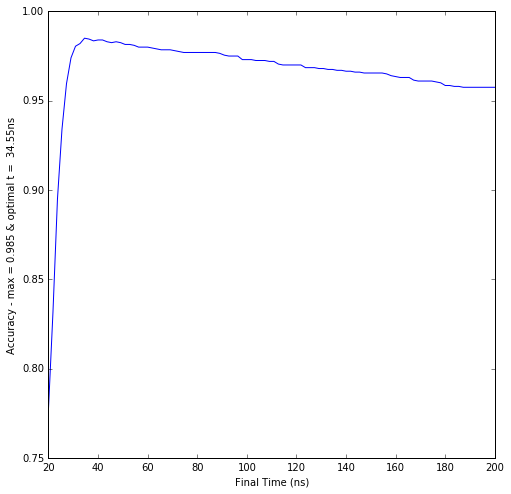

In [51]:
figsize(8,8)
plot(200*ratios,acs)
ylabel("Accuracy - max = " +str(np.max(acs)) + " & optimal t = %6.2f" %(200*ratios[np.argmax(acs)]) +"ns")
xlabel("Final Time (ns)")

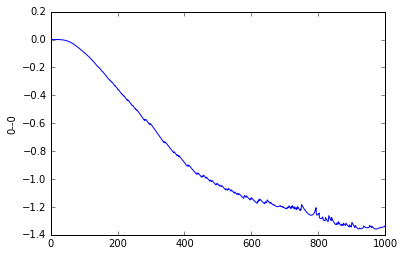

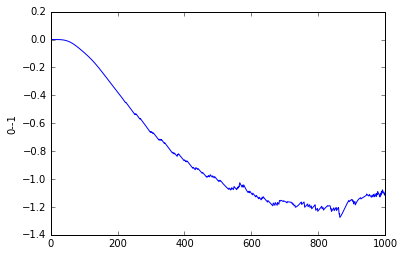

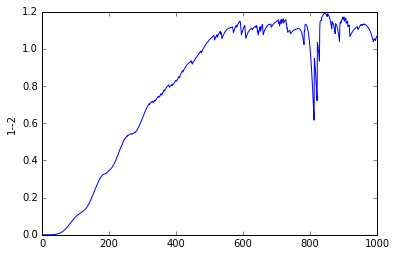

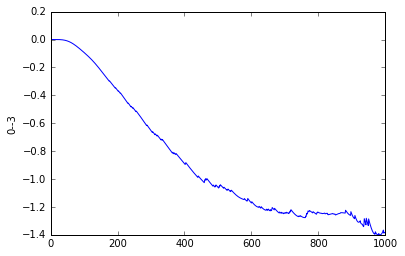

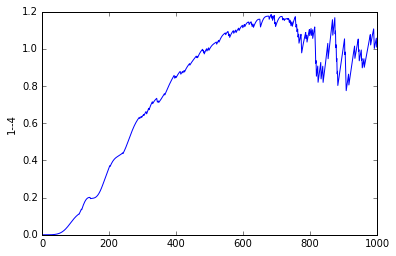

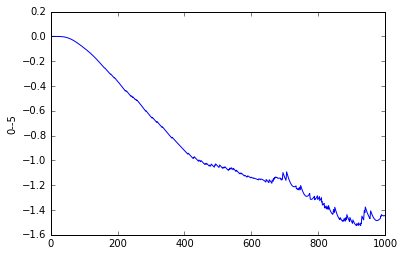

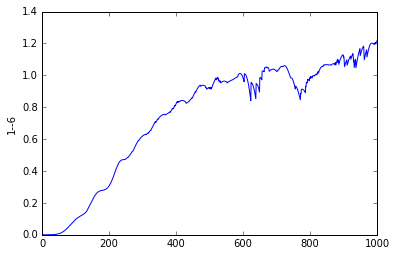

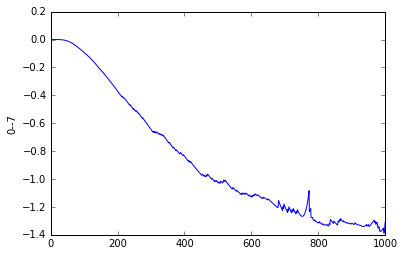

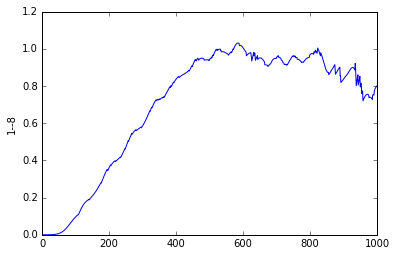

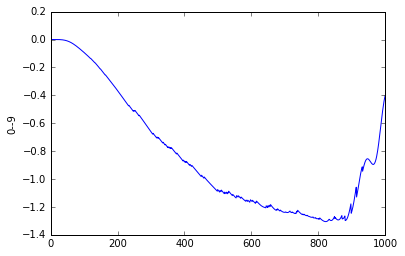

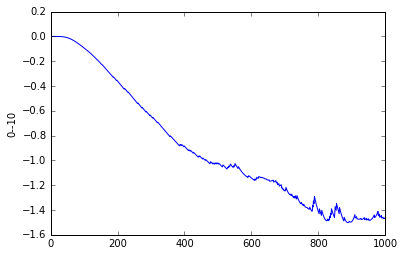

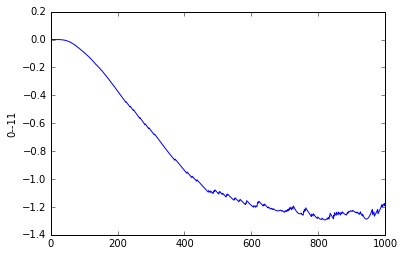

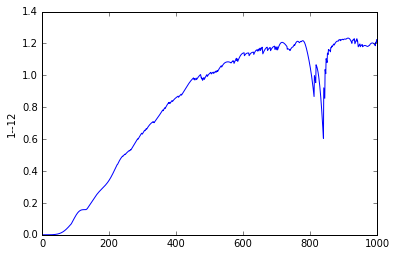

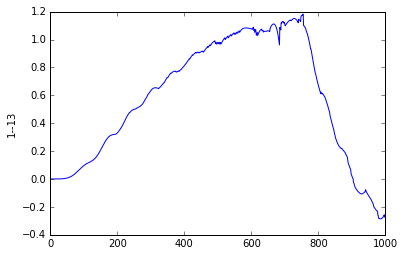

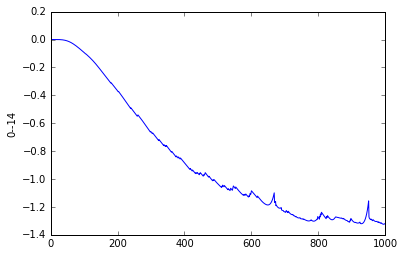

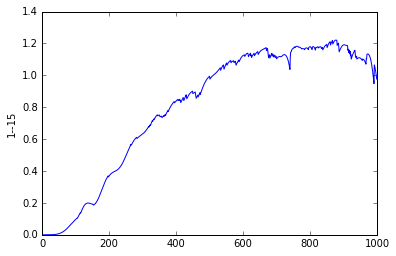

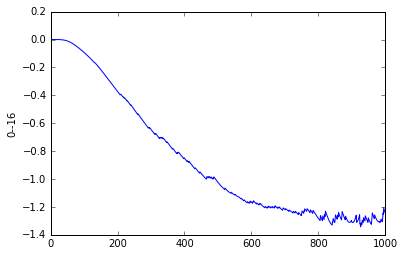

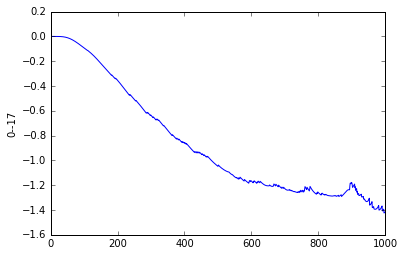

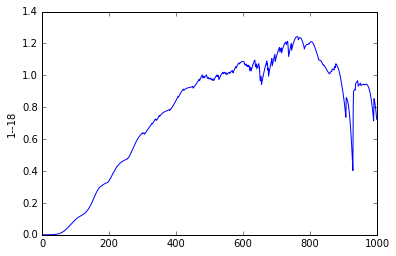

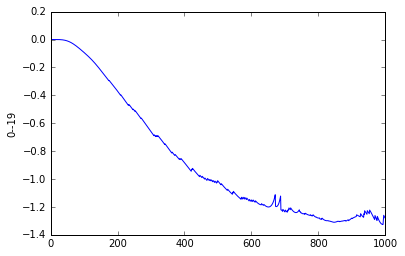

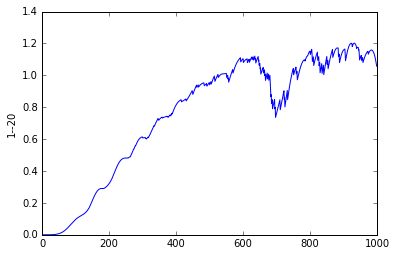

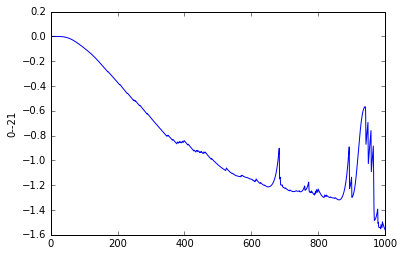

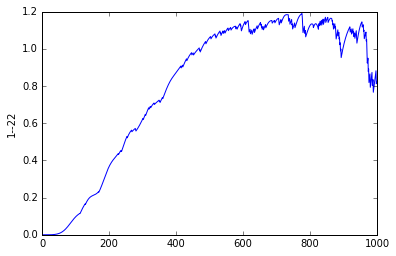

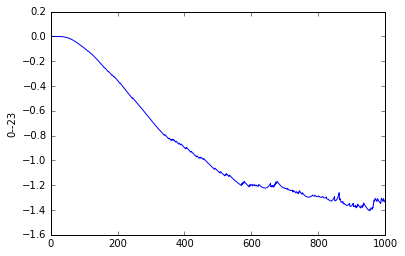

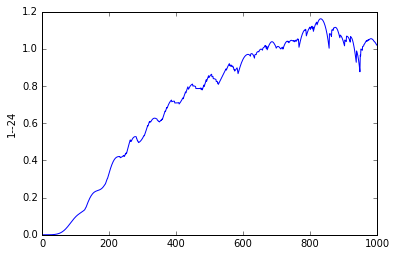

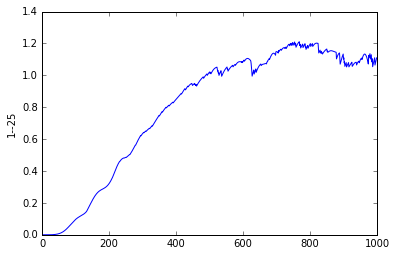

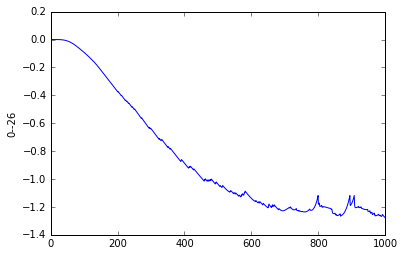

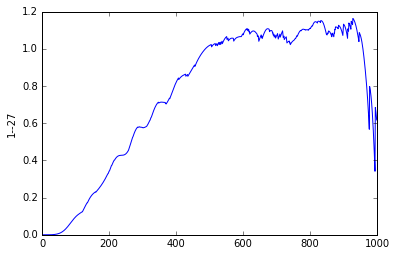

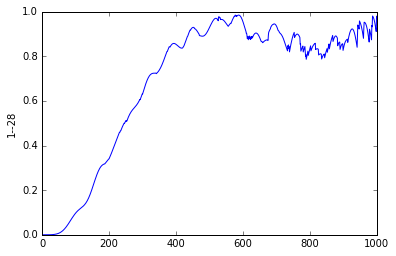

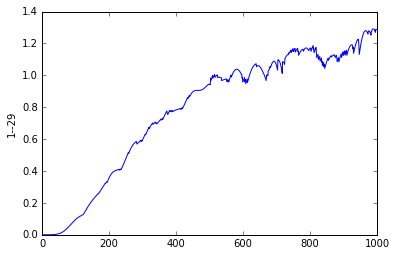

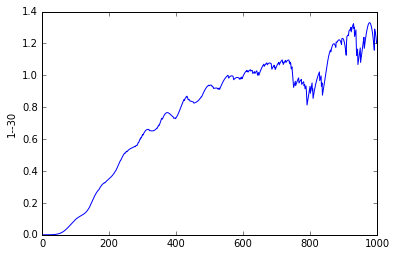

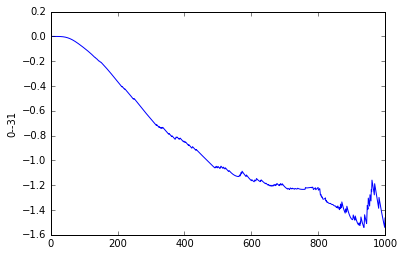

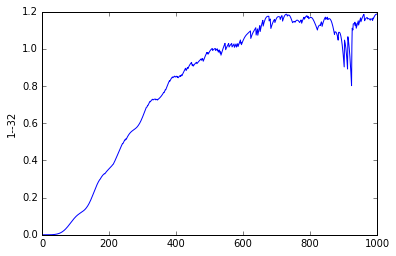

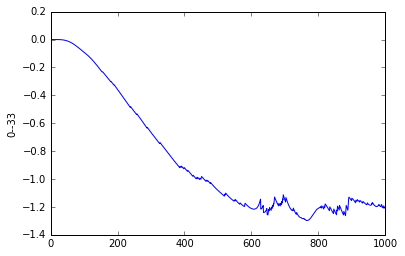

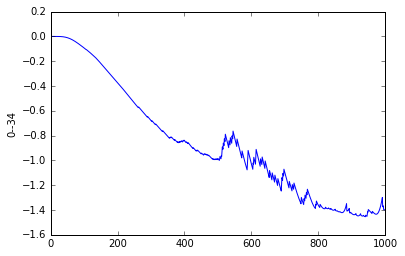

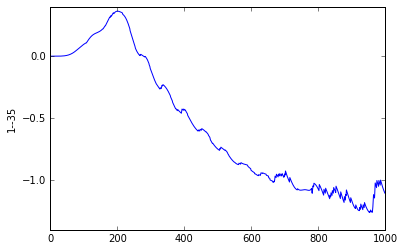

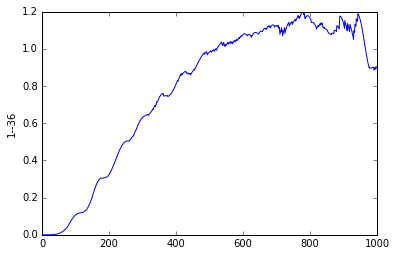

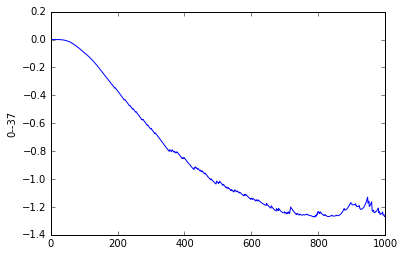

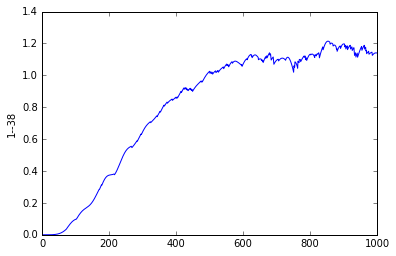

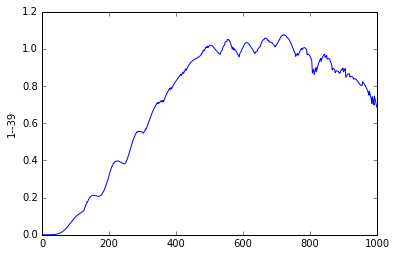

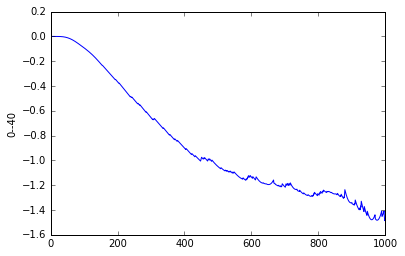

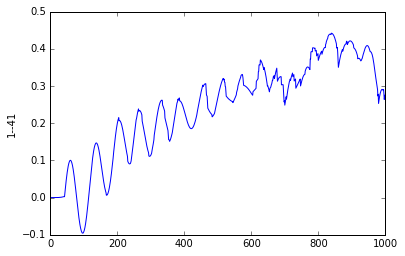

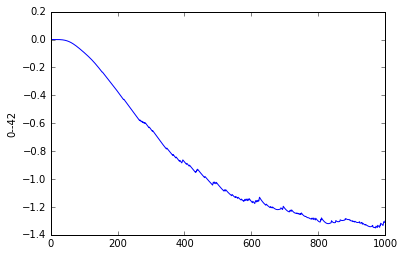

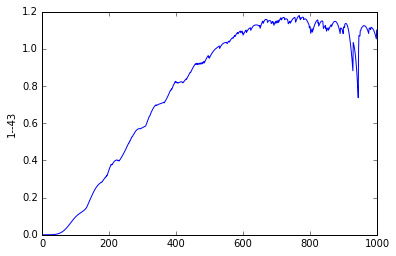

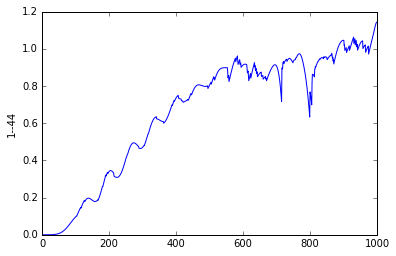

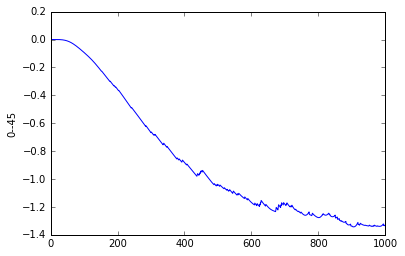

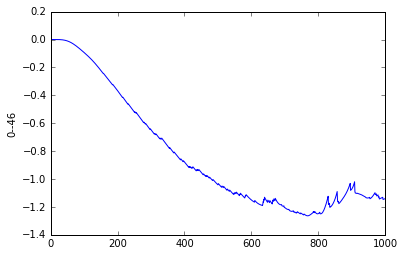

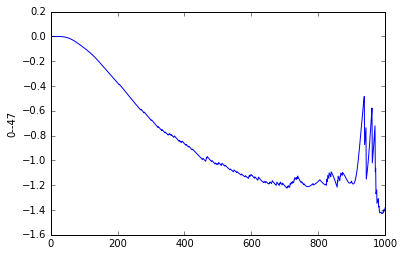

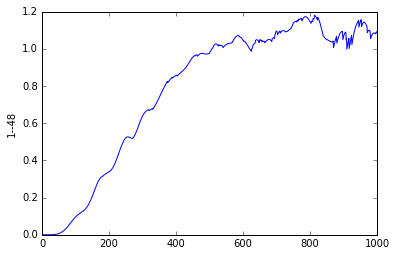

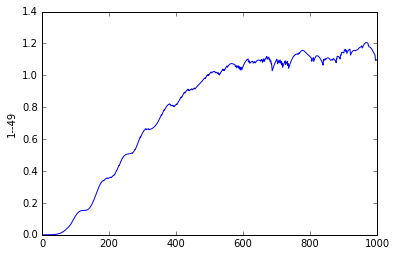

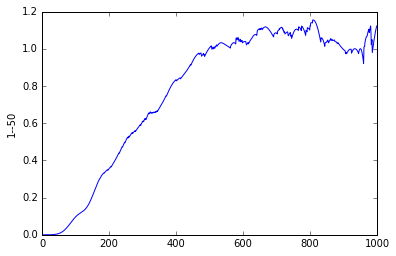

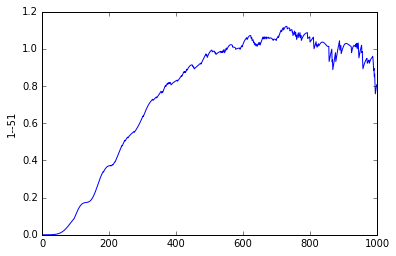

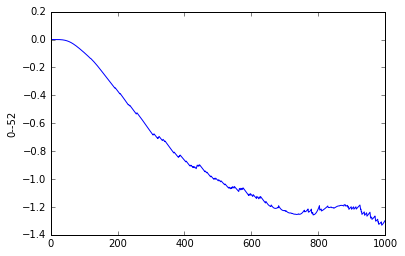

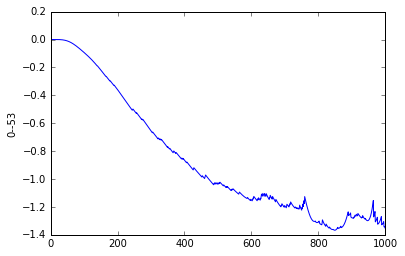

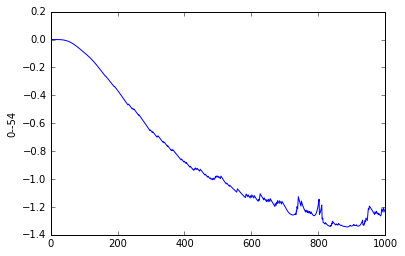

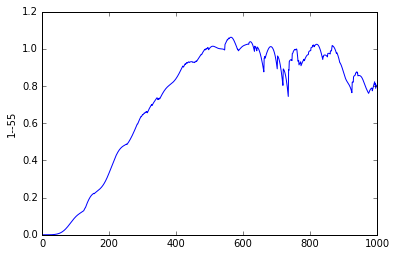

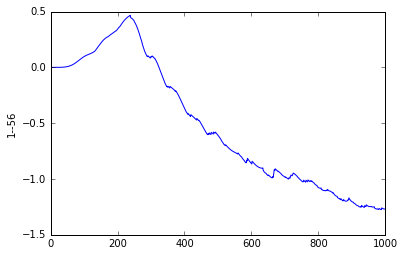

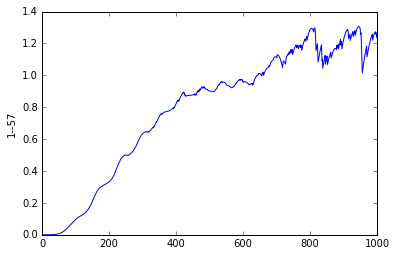

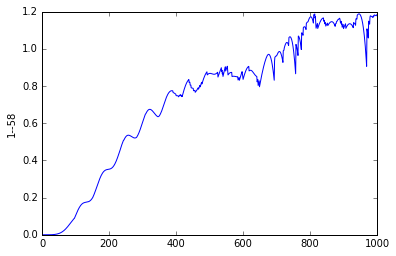

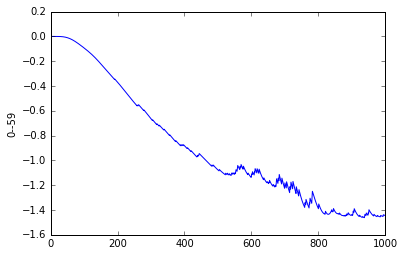

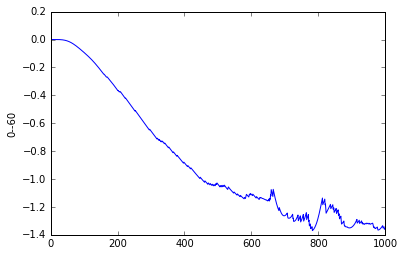

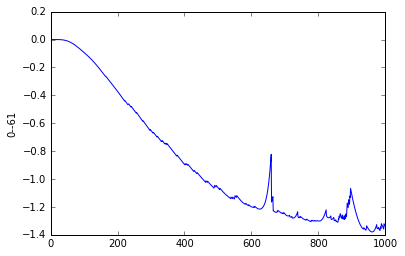

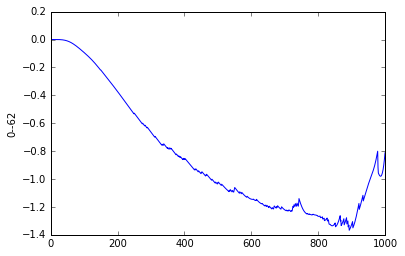

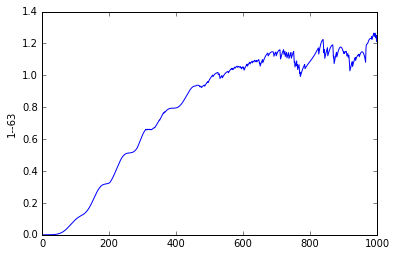

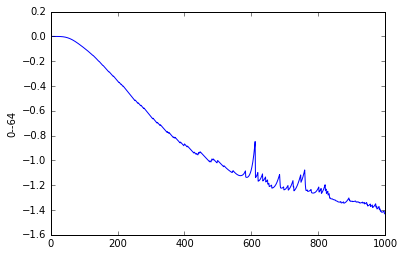

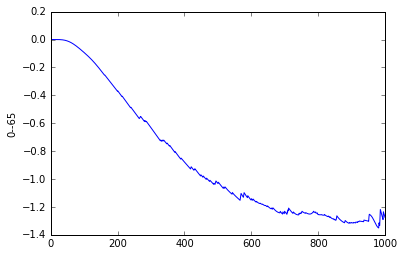

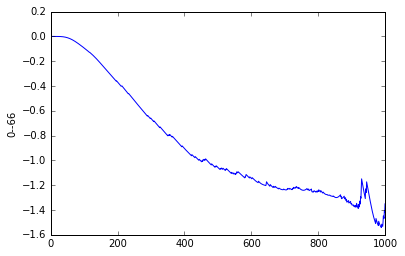

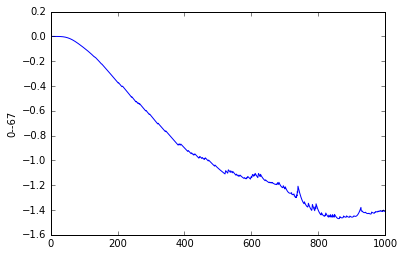

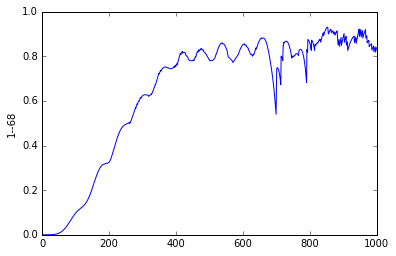

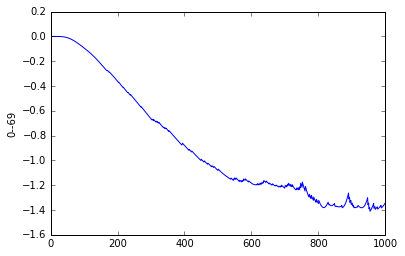

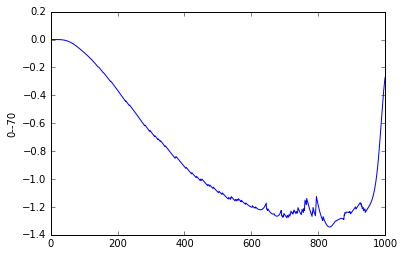

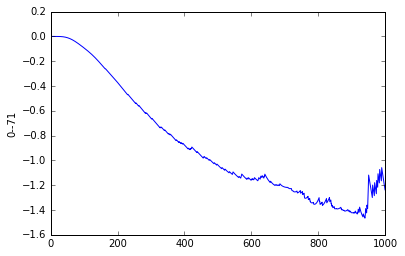

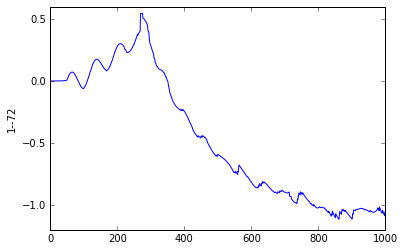

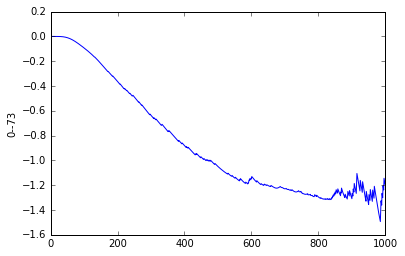

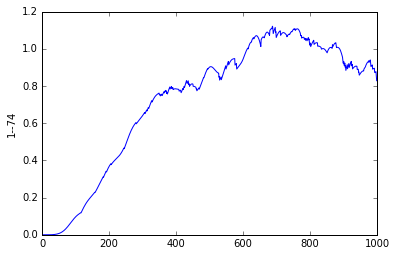

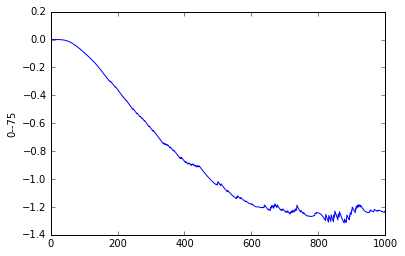

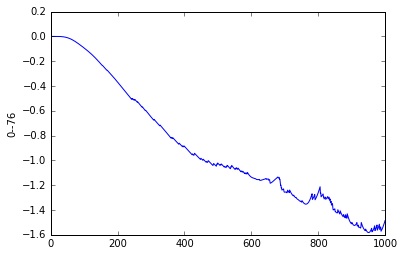

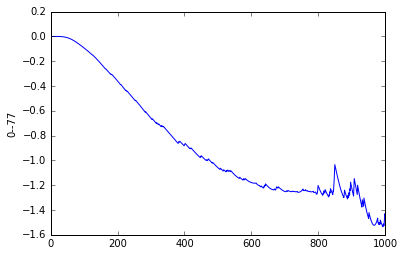

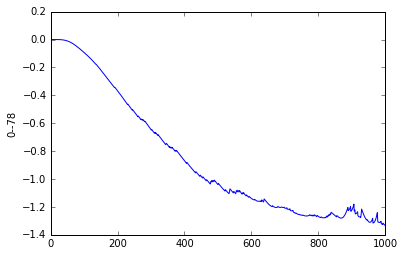

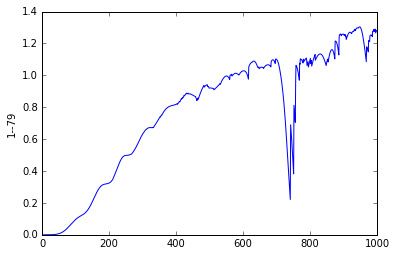

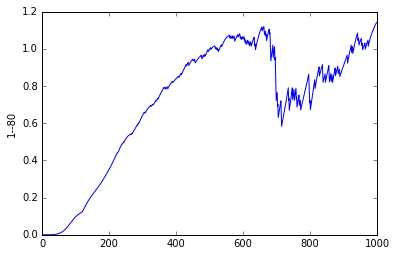

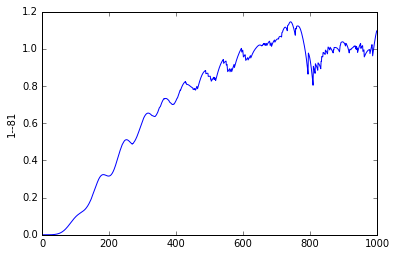

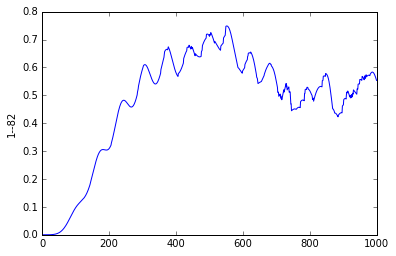

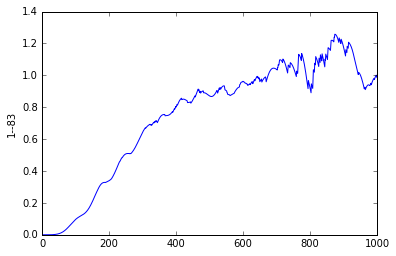

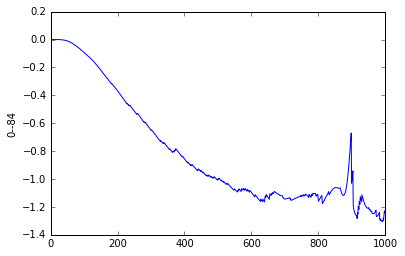

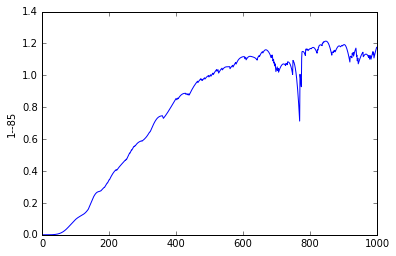

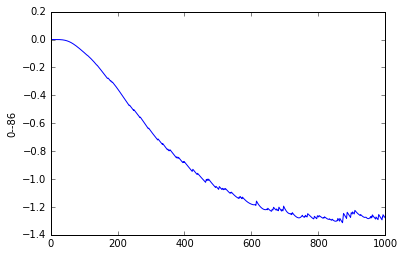

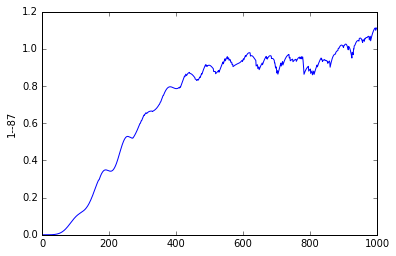

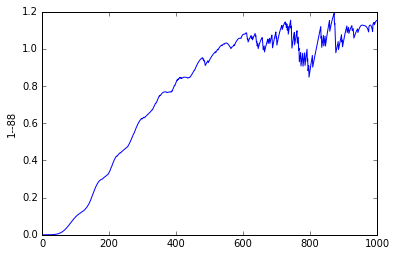

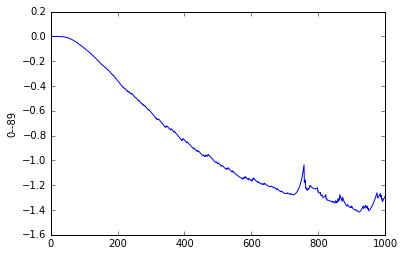

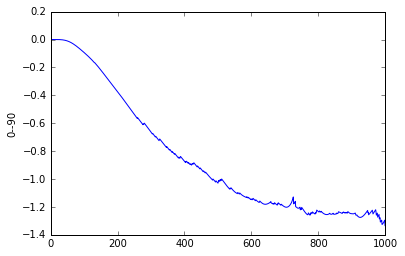

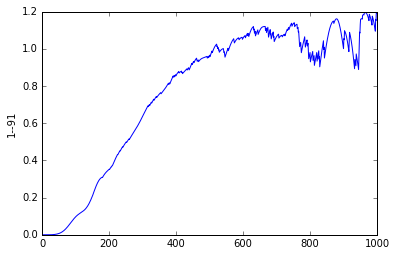

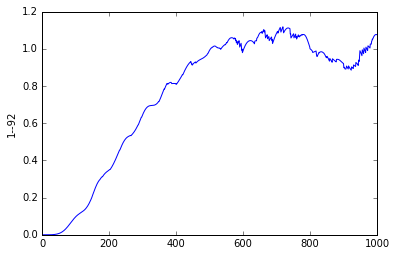

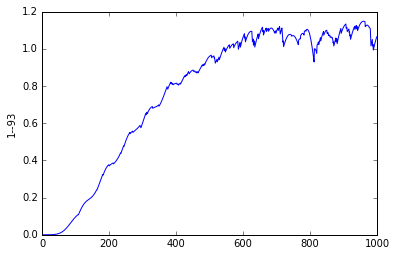

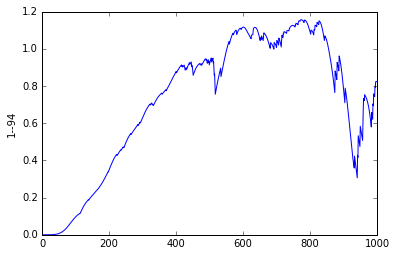

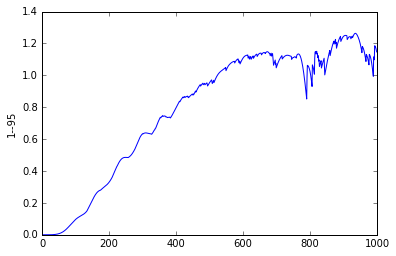

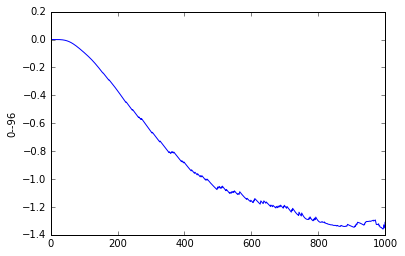

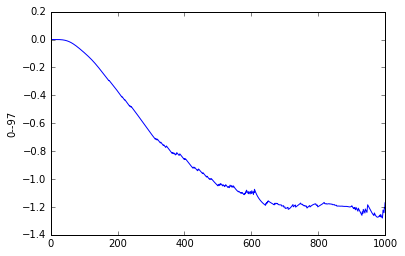

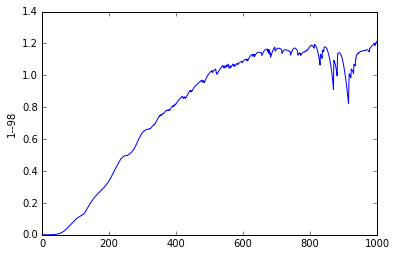

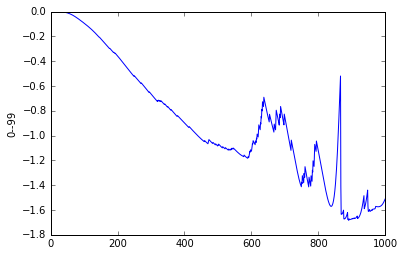

In [56]:
for idx in range(100):
    figure()
    plot (arange(steps), all_test[idx])
    ylabel(str(np.argmax(all_test_labels[idx])) + "--"+str(idx))

Populating the interactive namespace from numpy and matplotlib
(1, 1000)
0.09812387079
0.625692650662


`%matplotlib` prevents importing * from pylab and numpy


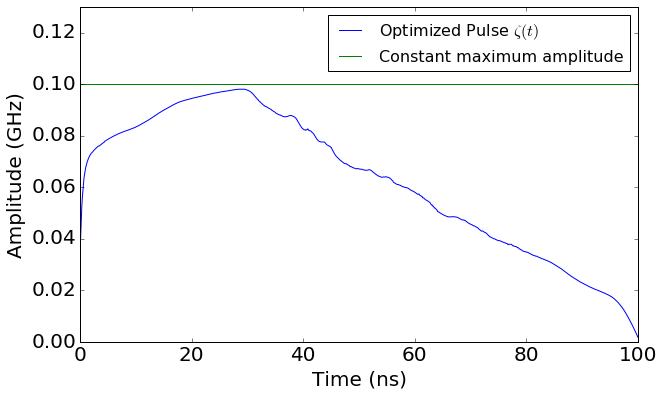

In [289]:
import h5py
import numpy as np 
from matplotlib import pyplot as plt    
total_time = 100
steps = 1000
%pylab inline

from IPython import display


#485
with h5py.File('/home/mohamed/Data/00485_JC.h5','r') as hf:
    u0 = np.array(hf.get('uks'))[-1]


u0 = [np.interp(np.linspace(0,total_time, steps),np.linspace(0,total_time, len(u0[0])),u0[0])]
#u0 = None
print np.shape(u0)
print np.max(u0[0])
#u0 = []
#signal = 0.1*np.tanh(np.linspace(0,total_time, steps)/10)
#u0.append(signal)
#u0.append(signal)
#u0.append(2*np.ones(steps))

#u0 = None
fig = plt.figure(figsize=(10,6)) 
matplotlib.rcParams.update({'font.size': 20})


plt.plot (np.linspace(0,total_time, steps), u0[0],label="Optimized Pulse $\zeta(t)$")
plt.plot (np.linspace(0,total_time, steps), 0.1*np.ones(steps), label = "Constant maximum amplitude")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude (GHz)")
plt.ylim(0,0.13)
#matplotlib.rcParams.update({'font.size': 12})

plt.legend(loc='upper right',prop={'size': 16})

print (np.sum(u0[0]))/np.sum(0.1*np.ones(steps))

In [35]:
from qutip import *

total_time = 200
steps = 1000
time_list = np.linspace(0,total_time, steps)
mode_state_num = 25
qubit_state_num = 2
RWA = True
RFT = True

#Blais parameters:
kappa = 1.0/160
gamma = 0.001
fc = 10
fa = 9
g = 0.1*np.pi

kappa = 0.05
gamma = 0.001
g = 0.05
fc = 5/(2*np.pi)
fa = 4.6/(2*np.pi)

a = tensor(destroy(mode_state_num), qeye(qubit_state_num))
sm = tensor(qeye(mode_state_num), destroy(qubit_state_num))
wc = 2*np.pi*fc
wa = 2*np.pi*fa
if RWA:
    H0 = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a *sm.dag())
else:
    H0 = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

        
en,es=H0.eigenstates()
g0 = es[0]
e0 = es[1]

if RFT:
    
    H0 = (wa -wc) * sm.dag() *sm + g * (a.dag() * sm + a *sm.dag())
   
    

c_ops = []
c_ops.append(np.sqrt(kappa)*a)
c_ops.append(np.sqrt(gamma)*sm)

HI = a + a.dag()
HQ = (0+1j)* (a-a.dag())
            
args ={}
args['wc'] = wc
if RFT:
    Isignal = "0.1*tanh(t/10.)"
else:
    Isignal = "0.001*tanh(t/10.)*cos(wc*t)"

H = [H0, [HI, Isignal]]
steps = int(steps*ratio)

for ii in range (100):
    g_output = mcsolve(H, g0, time_list, c_ops, [ HI], options=Options(nsteps=15), ntraj =1, args = args,progress_bar = False)

    e_output = mcsolve(H, e0, time_list, c_ops, [ HI], options=Options(nsteps=15), ntraj = 1, args= args,progress_bar = False)
    #Ie = e_output.expect[0][0,0:steps] + AWGN(steps, 20,0.2)
    #Ig = g_output.expect[0] [0,0:steps]+ AWGN(steps, 20,0.2)
    Ie = e_output.expect[0][0:steps]+ AWGN(steps, 20,0.2)
    Ig = g_output.expect[0][0:steps]+ AWGN(steps, 20,0.2)

    ac, res, inpu  = (sess.run([accuracy,y,y_], feed_dict={x: [Ie],
                                      y_: [[0,1]]}))
    print (ac)
    ac, res, inpu  = (sess.run([accuracy,y,y_], feed_dict={x: [Ig],
                                      y_: [[1,0]]}))
    print (ac)

1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
